In [1]:
# 다중분석을 해봅시다. 로이터 기사 데이터를 가지고 옵니다.
# 의미있는 단어로 나누는 과정을 토크나이제이션이라 하고 의미있는 단어는 토큰이라고 부릅니다.
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)  # 가장 빈도수가 높은 단어 10000개를 가지고 옵니다.

In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
train_data[0]  # 데이터를 보니 문자를 숫자로 벡터라이즈화 된 데이터입니다.

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [5]:
# 학습데이터와 테스트 데이터를 벡터라이즈화 해줍니다. 
x_train = vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [6]:
# 라벨 데이터는 원핫인코딩을 이용하여 카테고리 데이터로 전환해줍니다.
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# 신경망을 제작해봅시다.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))  # 레이어는 덴스레이어, 활성화함수는 ReLU, 입력되는 모양은 가로가 10000개이고 세로는모른다는 뜻 입니다.
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  # 최종결과는 46개입니다. 그 중 1개가 선택됩니다.

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# 검증데이터를 쪼개봅시다.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# 학습을 시켜봅시다.
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 2.6036 - accuracy: 0.5254 - val_loss: 1.7895 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.5154 - accuracy: 0.6863 - val_loss: 1.3694 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.1797 - accuracy: 0.7516 - val_loss: 1.1934 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.9718 - accuracy: 0.7959 - val_loss: 1.0905 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.8153 - accuracy: 0.8259 - val_loss: 1.0279 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6826 - accuracy: 0.8515 - val_loss: 0.9758 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5783 - accuracy: 0.8760 - val_loss: 0.9487 - val_accuracy: 0.8050
Epoch 8/20
16

In [11]:
import matplotlib.pyplot as plt

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

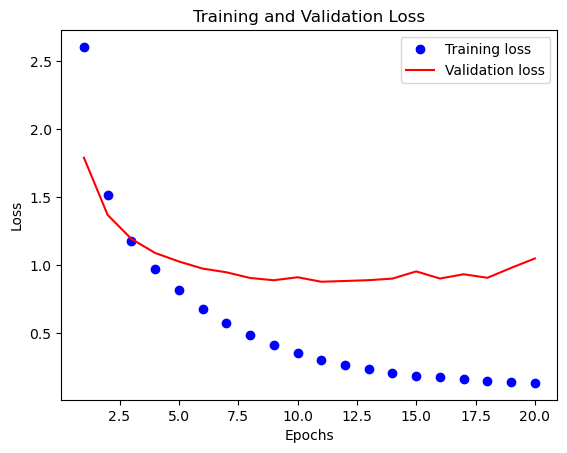

In [13]:
epochs = range(1, len(loss)+1)  # 반복횟수를 구합니다.

# 이제 그려봅시다.
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

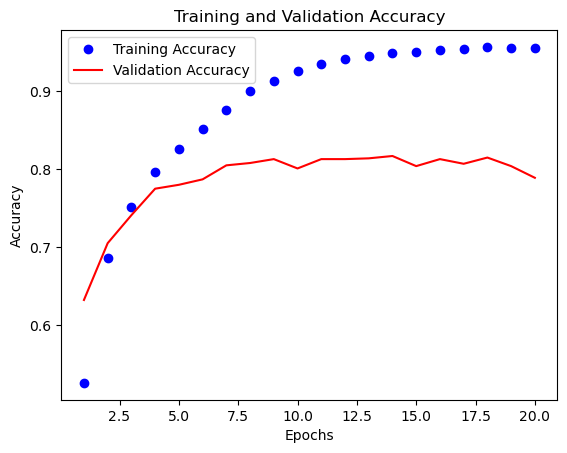

In [14]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
# 검증된 최적화 횟수로 다시 학습시켜봅시다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=11, batch_size=512, validation_data=(x_val, y_val))
eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/11
16/16 [==============================] - 1s 48ms/step - loss: 2.9198 - accuracy: 0.5005 - val_loss: 1.9550 - val_accuracy: 0.6220
Epoch 2/11
16/16 [==============================] - 1s 35ms/step - loss: 1.5855 - accuracy: 0.6807 - val_loss: 1.3577 - val_accuracy: 0.7080
Epoch 3/11
16/16 [==============================] - 0s 30ms/step - loss: 1.1659 - accuracy: 0.7527 - val_loss: 1.1709 - val_accuracy: 0.7520
Epoch 4/11
16/16 [==============================] - 1s 32ms/step - loss: 0.9542 - accuracy: 0.7938 - val_loss: 1.0804 - val_accuracy: 0.7570
Epoch 5/11
16/16 [==============================] - 0s 26ms/step - loss: 0.7982 - accuracy: 0.8272 - val_loss: 1.0118 - val_accuracy: 0.7760
Epoch 6/11
16/16 [==============================] - 0s 26ms/step - loss: 0.6739 - accuracy: 0.8538 - val_loss: 0.9798 - val_accuracy: 0.7880
Epoch 7/11
16/16 [==============================] - 0s 25ms/step - loss: 0.5749 - accuracy: 0.8753 - val_loss: 0.9437 - val_accuracy: 0.7880
Epoch 8/11
16